In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Admission_Predict_Ver1.1.csv")
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(columns=['Serial No.'],inplace=True)

In [6]:
df.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
x = df.iloc[:,:-1] # Select all rows, all columns except the last one
y = df.iloc[:,-1] # Select all rows, only the last column

In [10]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [15]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [34]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=7))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                80        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [37]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.5306 - val_loss: 0.5117
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4303 - val_loss: 0.4146
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3436 - val_loss: 0.3272
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2648 - val_loss: 0.2469
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1931 - val_loss: 0.1742
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1317 - val_loss: 0.1109
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0805 - val_loss: 0.0617
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0428 - val_loss: 0.0317
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.0188
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.0167
Epoch 11

In [38]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8245113031696482

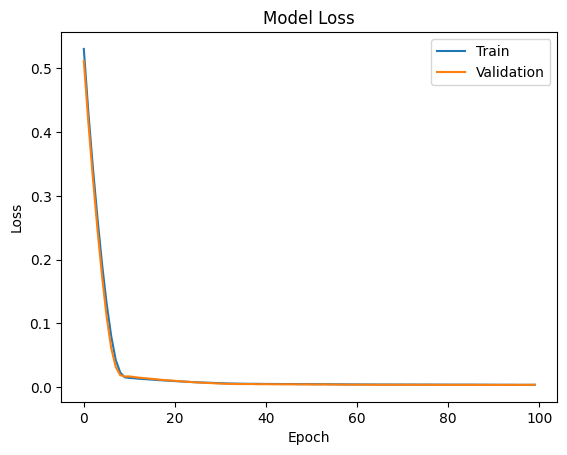

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()